In [ ]:
%matplotlib inline
import numpy as np

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# To store dataset in a Pandas Dataframe
import io
data = pd.read_excel(io.BytesIO(uploaded['Речевая функция.xlsx']))

Saving Речевая функция.xlsx to Речевая функция.xlsx


In [ ]:
data.head()

Installing MNE and Dependencies

In [ ]:
#!setup.py install https://github.com/mne-tools/mne-python/archive/master.zip
#!pip uninstall mne   ## THE MOST RECENT VERSION: 0.21
!pip install -U mne # THE MOST RECENT **STABLE** VERSION: 0.20.7
#!pip install https://github.com/mne-tools/mne-python/archive/master.zip




import os.path as op
import os
import numpy as np
import mne
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pydoc import help
from scipy.stats.stats import pearsonr
!pip3 install git+https://github.com/sappelhoff/pyprep.git
!pip3 install pyprep
import os
import pathlib
import mne
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pyprep.prep_pipeline import PrepPipeline

#verifying version / system info
mne.sys_info()

     |████████████████████████████████| 6.9MB 3.9MB/s 
  Cloning https://github.com/sappelhoff/pyprep.git to /tmp/pip-req-build-piem0cqn
  Running command git clone -q https://github.com/sappelhoff/pyprep.git /tmp/pip-req-build-piem0cqn
  Created wheel for pyprep: filename=pyprep-0.3.1+11.g447634e-py2.py3-none-any.whl size=21119 sha256=15a8e9cf9a1e10de8eb170e5634ce90b40456d9a57cf38b38bc934364579d92f
  Stored in directory: /tmp/pip-ephem-wheel-cache-119zbx_s/wheels/18/0d/a1/4dbaa612e049ed8186d20e84c9d5eb083e8f2adce1ab5ad7c6
Successfully built pyprep


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Platform:      Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python:        3.6.9 (default, Oct  8 2020, 12:12:24)  [GCC 8.4.0]
Executable:    /usr/bin/python3
CPU:           x86_64: 2 cores
Memory:        12.7 GB

mne:           0.22.0
numpy:         1.19.5 {blas=openblas, lapack=openblas}
scipy:         1.4.1
matplotlib:    3.2.2 {backend=module://ipykernel.pylab.backend_inline}

sklearn:       0.22.2.post1
numba:         0.48.0
nibabel:       3.0.2
nilearn:       Not found
dipy:          Not found
cupy:          Not found
pandas:        1.1.5
mayavi:        Not found
pyvista:       Not found
vtk:           Not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
raw_data_file1 = os.path.join('/content/drive/', 'My Drive', 'Scientific Research', 'Data', '40720.edf')
raw_data_file2 = os.path.join('/content/drive/', 'My Drive', 'Scientific Research', 'Data', '431120.edf')
raw_data_file3 = os.path.join('/content/drive/', 'My Drive', 'Scientific Research', 'Data', '592120.edf')
raw_data_file4 = os.path.join('/content/drive/', 'My Drive', 'Scientific Research', 'Data', '651520.edf')
raw_data_file5 = os.path.join('/content/drive/', 'My Drive', 'Scientific Research', 'Data', '754120.edf')
raw_data_file6 = os.path.join('/content/drive/', 'My Drive', 'Scientific Research', 'Data', '770920.edf')
raw_data_file7 = os.path.join('/content/drive/', 'My Drive', 'Scientific Research', 'Data', '931819.edf')
raw_data_file8 = os.path.join('/content/drive/', 'My Drive', 'Scientific Research', 'Data', '939919.edf')
print(raw_data_file1)
print(raw_data_file2)
print(raw_data_file3)
print(raw_data_file4)
print(raw_data_file5)
print(raw_data_file6)
print(raw_data_file7)
print(raw_data_file8)

/content/drive/My Drive/Scientific Research/Data/40720.edf
/content/drive/My Drive/Scientific Research/Data/431120.edf
/content/drive/My Drive/Scientific Research/Data/592120.edf
/content/drive/My Drive/Scientific Research/Data/651520.edf
/content/drive/My Drive/Scientific Research/Data/754120.edf
/content/drive/My Drive/Scientific Research/Data/770920.edf
/content/drive/My Drive/Scientific Research/Data/931819.edf
/content/drive/My Drive/Scientific Research/Data/939919.edf


Getting Basic Information on EEG (EDF) Files (i.e. channel names, duration, filtering, sampling rate, etc.)

Extracting EDF parameters from /content/drive/My Drive/Scientific Research/Data/40720.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7499  =      0.000 ...     0.300 secs...
<RawEDF | 40720.edf, 8 x 7500 (0.3 s), ~482 kB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EMG-0, EMG-1, EMG-2, EMG-3, EMG-4, EMG-5, EMG-6, EMG-7
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 12500.0 Hz
 meas_date: 2020-01-23 09:40:27 UTC
 nchan: 8
 projs: []
 sfreq: 25000.0 Hz
>


<ipython-input-91-0482c6c0dd24>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EMG'}. Applying running numbers for duplicates.
  raw_data_file1 = mne.io.read_raw_edf(raw_data_file1,preload=True)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


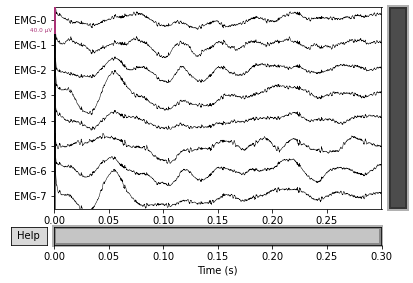

Figure(432x288)


In [91]:
raw_data_file1 = mne.io.read_raw_edf(raw_data_file1,preload=True)
print(raw_data_file1)
print(raw_data_file1.info)
print(raw_data_file1.plot(n_channels = 72))


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


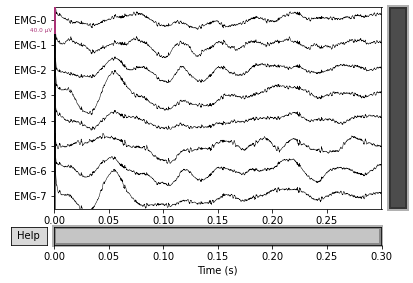

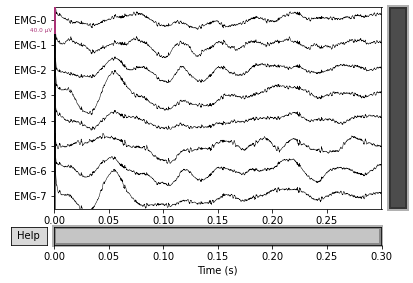

In [92]:
raw_data_file1.copy().pick_types(eeg = True, stim=True).plot()

After flagging bad channels, it is common practice to interpolate data for the bad channels based on the data from the good channels. Interpolation is a way of filling in the missing data based on the other data available.

In [93]:
raw_data_file1.interpolate_bads(reset_bads=False)  

<ipython-input-93-a46ed52d4a62>:1: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw_data_file1.interpolate_bads(reset_bads=False)


<RawEDF | 40720.edf, 8 x 7500 (0.3 s), ~482 kB, data loaded>

Extracting EDF parameters from /content/drive/My Drive/Scientific Research/Data/431120.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7499  =      0.000 ...     0.300 secs...


<ipython-input-6-56f5ee8ee6e7>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EMG'}. Applying running numbers for duplicates.
  raw_data_file2 = mne.io.read_raw_edf(raw_data_file2,preload=True)


<Info | 7 non-empty values
 bads: []
 ch_names: EMG-0, EMG-1, EMG-2, EMG-3, EMG-4, EMG-5, EMG-6, EMG-7
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 12500.0 Hz
 meas_date: 2020-07-22 10:41:55 UTC
 nchan: 8
 projs: []
 sfreq: 25000.0 Hz
>


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


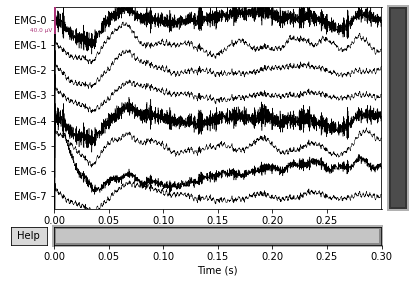

Figure(432x288)


In [ ]:
raw_data_file2 = mne.io.read_raw_edf(raw_data_file2,preload=True)

print(raw_data_file2.info)
print(raw_data_file2.plot(block=True))

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


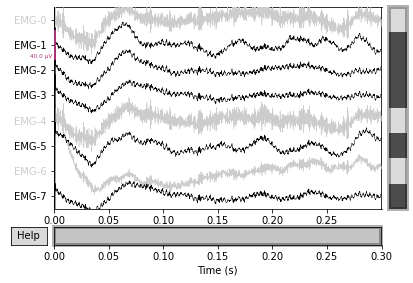

Figure(432x288)


In [ ]:
#we see that here we have noise at channel EMG-0,EMG-4,EMG-6
raw_data_file2.info['bads'] += ['EMG-0','EMG-4','EMG-6'] 
picks = mne.pick_types(raw_data_file2.info, exclude='bads') 
print(raw_data_file2.plot(block=True))

Extracting EDF parameters from /content/drive/My Drive/Scientific Research/Data/592120.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7499  =      0.000 ...     0.300 secs...


<ipython-input-8-f9797d29c9ee>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EMG'}. Applying running numbers for duplicates.
  raw_data_file3 = mne.io.read_raw_edf(raw_data_file3,preload=True)


<Info | 7 non-empty values
 bads: []
 ch_names: EMG-0, EMG-1, EMG-2, EMG-3, EMG-4, EMG-5, EMG-6, EMG-7
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 12500.0 Hz
 meas_date: 2020-09-28 10:20:47 UTC
 nchan: 8
 projs: []
 sfreq: 25000.0 Hz
>


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


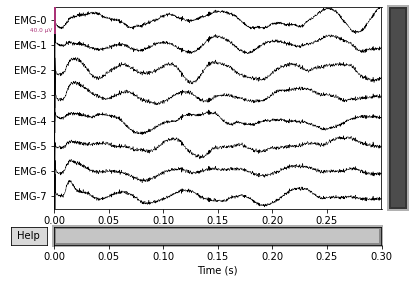

Figure(432x288)


In [ ]:
raw_data_file3 = mne.io.read_raw_edf(raw_data_file3,preload=True)
print(raw_data_file3.info)
print(raw_data_file3.plot(block=True))

Extracting EDF parameters from /content/drive/My Drive/Scientific Research/Data/651520.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7499  =      0.000 ...     0.300 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: EMG-0, EMG-1, EMG-2, EMG-3, EMG-4, EMG-5, EMG-6, EMG-7, EMG-8, ...
 chs: 16 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 12500.0 Hz
 meas_date: 2020-10-26 09:53:33 UTC
 nchan: 16
 projs: []
 sfreq: 25000.0 Hz
>


<ipython-input-9-eaeabaec16e1>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EMG'}. Applying running numbers for duplicates.
  raw_data_file4 = mne.io.read_raw_edf(raw_data_file4,preload=True)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


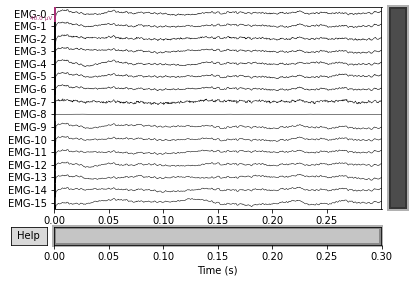

Figure(432x288)


In [ ]:
raw_data_file4 = mne.io.read_raw_edf(raw_data_file4,preload=True)
print(raw_data_file4.info)
print(raw_data_file4.plot(block=True))

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


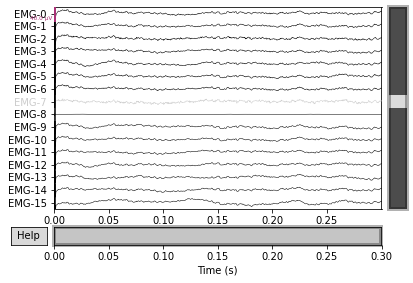

Figure(432x288)


In [ ]:
raw_data_file4.info['bads'] += ['EMG-7'] 
picks = mne.pick_types(raw_data_file4.info, exclude='bads') 
print(raw_data_file4.plot(block=True))

Extracting EDF parameters from /content/drive/My Drive/Scientific Research/Data/754120.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7499  =      0.000 ...     0.300 secs...


<ipython-input-11-b4c964be4a47>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EMG'}. Applying running numbers for duplicates.
  raw_data_file5 = mne.io.read_raw_edf(raw_data_file5,preload=True)


<Info | 7 non-empty values
 bads: []
 ch_names: EMG-0, EMG-1, EMG-2, EMG-3, EMG-4, EMG-5, EMG-6, EMG-7, EMG-8, ...
 chs: 16 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 12500.0 Hz
 meas_date: 2020-12-07 09:41:34 UTC
 nchan: 16
 projs: []
 sfreq: 25000.0 Hz
>


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


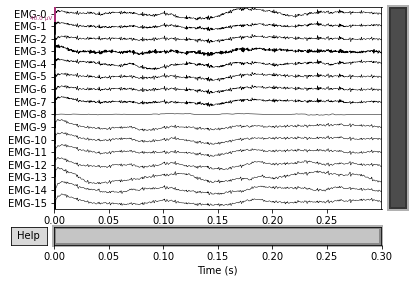

Figure(432x288)


In [ ]:
raw_data_file5 = mne.io.read_raw_edf(raw_data_file5,preload=True)
print(raw_data_file5.info)
print(raw_data_file5.plot(block=True))

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


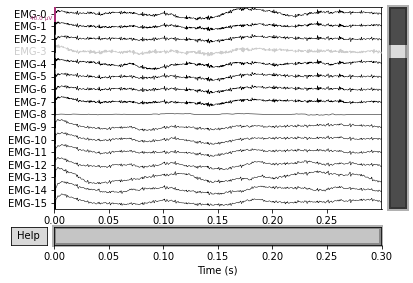

Figure(432x288)


In [ ]:
raw_data_file5.info['bads'] += ['EMG-3'] 
picks = mne.pick_types(raw_data_file5.info, exclude='bads') 
print(raw_data_file5.plot(block=True))

Extracting EDF parameters from /content/drive/My Drive/Scientific Research/Data/770920.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7499  =      0.000 ...     0.300 secs...


<ipython-input-13-0b823507b1a5>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'EMG'}. Applying running numbers for duplicates.
  raw_data_file6 = mne.io.read_raw_edf(raw_data_file6,preload=True)


<Info | 7 non-empty values
 bads: []
 ch_names: EMG-0, EMG-1, EMG-2, EMG-3, EMG-4, EMG-5, EMG-6, EMG-7, EMG-8, ...
 chs: 16 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 12500.0 Hz
 meas_date: 2020-12-14 10:01:14 UTC
 nchan: 16
 projs: []
 sfreq: 25000.0 Hz
>


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


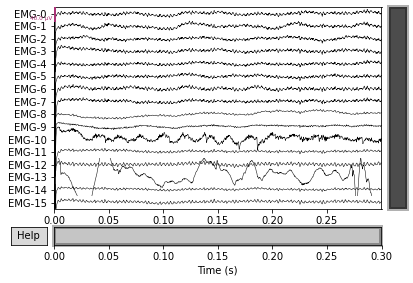

Figure(432x288)


In [ ]:

raw_data_file6 = mne.io.read_raw_edf(raw_data_file6,preload=True)
print(raw_data_file6.info)
print(raw_data_file6.plot(block=True))

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


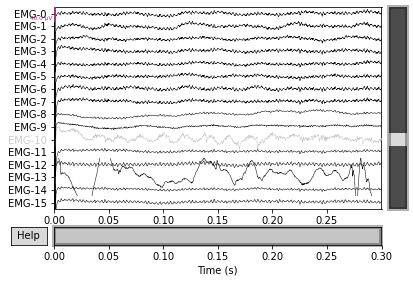

Figure(432x288)


In [ ]:
raw_data_file6.info['bads'] += ['EMG-10'] 
picks = mne.pick_types(raw_data_file6.info, exclude='bads') 
print(raw_data_file6.plot(block=True))

Extracting EDF parameters from /content/drive/My Drive/Scientific Research/Data/931819.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7499  =      0.000 ...     0.300 secs...


<ipython-input-15-838329985e49>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EMG'}. Applying running numbers for duplicates.
  raw_data_file7 = mne.io.read_raw_edf(raw_data_file7,preload=True)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


<Info | 7 non-empty values
 bads: []
 ch_names: EMG-0, EMG-1, EMG-2, EMG-3, EMG-4, EMG-5, EMG-6, EMG-7
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 12500.0 Hz
 meas_date: 2019-12-23 16:08:02 UTC
 nchan: 8
 projs: []
 sfreq: 25000.0 Hz
>


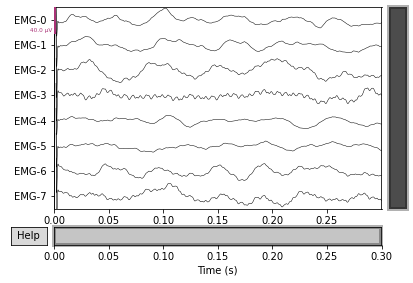

Figure(432x288)


In [ ]:
raw_data_file7 = mne.io.read_raw_edf(raw_data_file7,preload=True)
print(raw_data_file7.info)
print(raw_data_file7.plot(block=True))

Extracting EDF parameters from /content/drive/My Drive/Scientific Research/Data/939919.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7499  =      0.000 ...     0.300 secs...


<ipython-input-16-4625f6d9fee5>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EMG'}. Applying running numbers for duplicates.
  raw_data_file8 = mne.io.read_raw_edf(raw_data_file8,preload=True)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


<Info | 7 non-empty values
 bads: []
 ch_names: EMG-0, EMG-1, EMG-2, EMG-3, EMG-4, EMG-5, EMG-6, EMG-7
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 12500.0 Hz
 meas_date: 2019-12-26 09:42:48 UTC
 nchan: 8
 projs: []
 sfreq: 25000.0 Hz
>


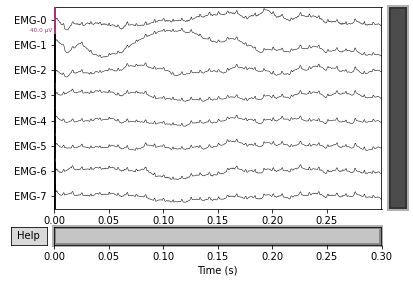

Figure(432x288)


In [ ]:
raw_data_file8 = mne.io.read_raw_edf(raw_data_file8,preload=True)
print(raw_data_file8.info)
print(raw_data_file8.plot(block=True))

Extracting Raw Data by Time and Channel and Saving to CSV File

In [ ]:
data1 = raw_data_file1.get_data()
data1 = pd.DataFrame(raw_data_file1.get_data())
print(data1)
# Transposing Raw Data so that Columns Correspond to Channels
data1 = data1.T
### Extracting  data by time, channel selection, and plotting this
#Selecting/Segmenting the data by time -checked-
raw_selection1 = raw_data_file1.copy().crop(tmin=0.11, tmax= 0.2)
data1_ = pd.DataFrame(raw_selection1.get_data())
data11 = data1_.T
print(data11)

       0         1         2     ...      7497      7498      7499
0 -0.004830 -0.005819 -0.006416  ...  0.000009  0.000009  0.000009
1 -0.004783 -0.005770 -0.006371  ...  0.000004  0.000004  0.000004
2 -0.004801 -0.005778 -0.006365  ...  0.000004  0.000003  0.000003
3 -0.004872 -0.005851 -0.006433  ...  0.000006  0.000006  0.000006
4 -0.004749 -0.005734 -0.006337  ...  0.000005  0.000005  0.000005
5 -0.004772 -0.005748 -0.006338  ... -0.000001 -0.000001 -0.000002
6 -0.004854 -0.005835 -0.006423  ...  0.000010  0.000009  0.000009
7 -0.004744 -0.005701 -0.006272  ...  0.000005  0.000005  0.000005

[8 rows x 7500 columns]
             0         1         2  ...         5         6         7
0    -0.000004 -0.000003 -0.000008  ... -0.000022 -0.000017 -0.000013
1    -0.000004 -0.000003 -0.000008  ... -0.000022 -0.000016 -0.000013
2    -0.000004 -0.000003 -0.000008  ... -0.000022 -0.000016 -0.000012
3    -0.000004 -0.000003 -0.000008  ... -0.000022 -0.000016 -0.000012
4    -0.000004 -0.0000

In [ ]:
data2 = raw_data_file2.get_data()
data2 = pd.DataFrame(raw_data_file2.get_data())
print(data2)
# Transposing Raw Data so that Columns Correspond to Channels
data2 = data2.T
### Extracting  data by time, channel selection, and plotting this
#Selecting/Segmenting the data by time -checked-
raw_selection2 = raw_data_file2.copy().crop(tmin=0.11, tmax= 0.2)
data2_ = pd.DataFrame(raw_selection2.get_data())
data22 = data2_.T
print(data22)


       0         1         2     ...          7497      7498      7499
0 -0.000842 -0.001130 -0.001367  ... -4.173941e-07 -0.000001 -0.000002
1 -0.001698 -0.002092 -0.002354  ... -6.820756e-06 -0.000007 -0.000007
2 -0.001680 -0.002069 -0.002327  ...  5.523782e-06  0.000006  0.000006
3 -0.001835 -0.002259 -0.002539  ...  1.404296e-06  0.000001  0.000001
4 -0.000529 -0.000771 -0.000991  ...  7.241089e-06  0.000007  0.000007
5 -0.001275 -0.001571 -0.001766  ...  1.133906e-05  0.000011  0.000011
6 -0.000782 -0.000984 -0.001121  ...  6.674936e-06  0.000007  0.000007
7 -0.000854 -0.001055 -0.001191  ...  2.336732e-06  0.000002  0.000002

[8 rows x 7500 columns]
                 0             1         2  ...         5         6             7
0    -8.059034e-07  1.394033e-06 -0.000003  ... -0.000009 -0.000023  4.535201e-06
1     3.127754e-06  1.177855e-06 -0.000003  ... -0.000009 -0.000021  4.351995e-06
2     6.284392e-06  9.616759e-07 -0.000004  ... -0.000009 -0.000019  4.205430e-06
3     7.

In [ ]:
data3 = raw_data_file3.get_data()
data3 = pd.DataFrame(raw_data_file3.get_data())
print(data3)
# Transposing Raw Data so that Columns Correspond to Channels
data3 = data3.T
### Extracting  data by time, channel selection, and plotting this
#Selecting/Segmenting the data by time -checked-
raw_selection3 = raw_data_file3.copy().crop(tmin=0.11, tmax= 0.2)
data3_ = pd.DataFrame(raw_selection3.get_data())
data33 = data3_.T
print(data33)

       0         1         2     ...          7497          7498          7499
0 -0.000401 -0.000487 -0.000543  ...  2.054776e-05  2.046885e-05  2.042150e-05
1 -0.000935 -0.001136 -0.001264  ... -3.962016e-06 -3.962016e-06 -3.962016e-06
2 -0.001759 -0.002132 -0.002367  ... -1.133973e-05 -1.133973e-05 -1.133973e-05
3 -0.002947 -0.003564 -0.003946  ... -1.012087e-06 -8.938841e-07 -8.938841e-07
4 -0.000140 -0.000172 -0.000195  ...  4.983106e-06  4.923819e-06  4.882319e-06
5 -0.000599 -0.000719 -0.000792  ... -5.896836e-07 -5.668455e-07 -4.983310e-07
6 -0.001314 -0.001577 -0.001734  ... -3.634120e-06 -3.634120e-06 -3.634120e-06
7 -0.002413 -0.002908 -0.003207  ... -4.073228e-06 -4.073228e-06 -3.880902e-06

[8 rows x 7500 columns]
             0         1         2  ...         5             6         7
0     0.000007 -0.000002  0.000006  ...  0.000009  5.644084e-07  0.000004
1     0.000007 -0.000002  0.000006  ...  0.000009  5.644084e-07  0.000004
2     0.000007 -0.000002  0.000006  ...  0

In [ ]:
data4 = raw_data_file4.get_data()
data4 = pd.DataFrame(raw_data_file4.get_data())
print(data4)
# Transposing Raw Data so that Columns Correspond to Channels
data4 = data4.T
### Extracting  data by time, channel selection, and plotting this
#Selecting/Segmenting the data by time -checked-
raw_selection4 = raw_data_file4.copy().crop(tmin=0.11, tmax= 0.2)
data4_ = pd.DataFrame(raw_selection4.get_data())
data44 = data4_.T
print(data44)


        0         1         2     ...          7497          7498          7499
0   0.004430  0.005271  0.005715  ...  6.039325e-06  6.039325e-06  5.855913e-06
1   0.004370  0.005220  0.005683  ...  5.299695e-06  5.299695e-06  5.299695e-06
2   0.004377  0.005275  0.005803  ...  2.211238e-06  2.395920e-06  2.395920e-06
3   0.004355  0.005231  0.005729  ...  2.193566e-06  2.193566e-06  2.193566e-06
4   0.004329  0.005202  0.005699  ...  4.454017e-06  4.454017e-06  4.454017e-06
5   0.004345  0.005226  0.005732  ...  4.896138e-06  4.896138e-06  4.896138e-06
6   0.004346  0.005215  0.005707  ...  2.282106e-06  2.282106e-06  2.282106e-06
7   0.003888  0.004703  0.005204  ...  2.006596e-06  2.316018e-06  2.625440e-06
8   0.000004  0.000004  0.000004  ... -2.469385e-08 -2.682309e-08 -2.923624e-08
9   0.002376  0.002430  0.002358  ... -1.106771e-06 -1.179482e-06 -1.179482e-06
10  0.002265  0.002315  0.002245  ...  1.704128e-06  1.634902e-06  1.634902e-06
11  0.002039  0.002088  0.002028  ...  4

In [ ]:
data5 = raw_data_file5.get_data()
data5 = pd.DataFrame(raw_data_file5.get_data())
print(data5)
# Transposing Raw Data so that Columns Correspond to Channels
data5 = data5.T
### Extracting  data by time, channel selection, and plotting this
#Selecting/Segmenting the data by time -checked-
raw_selection5 = raw_data_file5.copy().crop(tmin=0.11, tmax= 0.2)
data5_ = pd.DataFrame(raw_selection5.get_data())
data55 = data5_.T
print(data55)


        0         1         2     ...          7497          7498          7499
0   0.002618  0.003183  0.003535  ... -3.431418e-07  8.789001e-08  5.189218e-07
1   0.003068  0.003737  0.004159  ...  2.420777e-06  2.800430e-06  3.053532e-06
2   0.003586  0.004372  0.004868  ... -2.565559e-06 -2.267090e-06 -1.968621e-06
3   0.003992  0.004849  0.005391  ... -2.422835e-06 -1.941089e-06 -1.619925e-06
4   0.002459  0.002989  0.003321  ...  2.786950e-06  3.190198e-06  3.593445e-06
5   0.003080  0.003751  0.004172  ... -1.720548e-06 -1.336740e-06 -1.080868e-06
6   0.003735  0.004543  0.005047  ... -2.869928e-06 -2.406612e-06 -2.097734e-06
7   0.004209  0.005111  0.005670  ... -7.351646e-07 -3.871632e-07 -2.131625e-07
8   0.000007  0.000008  0.000009  ... -1.524233e-06 -1.518165e-06 -1.509569e-06
9   0.002599  0.002658  0.002579  ... -6.551495e-07 -4.180835e-07 -1.810176e-07
10  0.003389  0.003456  0.003343  ...  2.354327e-06  2.564019e-06  2.878558e-06
11  0.003392  0.003423  0.003265  ... -2

In [ ]:
data6 = raw_data_file6.get_data()
data6 = pd.DataFrame(raw_data_file6.get_data())
print(data6)
# Transposing Raw Data so that Columns Correspond to Channels
data6 = data6.T
### Extracting  data by time, channel selection, and plotting this
#Selecting/Segmenting the data by time -checked-
raw_selection6 = raw_data_file6.copy().crop(tmin=0.11, tmax= 0.2)
data6_ = pd.DataFrame(raw_selection6.get_data())
data66 = data6_.T
print(data66)


        0         1         2     ...          7497          7498          7499
0  -0.001066 -0.001307 -0.001460  ...  3.043200e-07  7.408560e-08  1.201325e-07
1  -0.000223 -0.000272 -0.000301  ... -1.183330e-06 -1.377738e-06 -1.334536e-06
2   0.003014  0.003694  0.004135  ... -3.650215e-06 -4.023386e-06 -4.023386e-06
3   0.004346  0.005208  0.005687  ... -2.409383e-06 -2.780416e-06 -2.780416e-06
4   0.000755  0.000912  0.001010  ...  4.312312e-06  3.963378e-06  3.876144e-06
5   0.004106  0.005018  0.005601  ...  2.372595e-06  2.032562e-06  1.862546e-06
6   0.004354  0.005207  0.005672  ...  2.662394e-07  8.205501e-08 -1.021294e-07
7   0.004315  0.005140  0.005576  ...  2.600391e-06  2.242783e-06  2.421587e-06
8   0.001537  0.001575  0.001534  ...  5.342202e-06  5.433711e-06  5.525220e-06
9   0.003382  0.003414  0.003257  ...  2.904518e-06  2.904518e-06  2.904518e-06
10  0.003132  0.003121  0.002918  ... -2.454298e-06 -2.699066e-06 -2.576682e-06
11  0.003283  0.003285  0.003102  ...  4

In [ ]:
data7 = raw_data_file7.get_data()
data7 = pd.DataFrame(raw_data_file7.get_data())
print(data7)
# Transposing Raw Data so that Columns Correspond to Channels
data7 = data7.T
### Extracting  data by time, channel selection, and plotting this
#Selecting/Segmenting the data by time -checked-
raw_selection7 = raw_data_file7.copy().crop(tmin=0.11, tmax= 0.2)
data7_ = pd.DataFrame(raw_selection7.get_data())
data77 = data7_.T
print(data77)



       0         1         2     ...          7497          7498          7499
0 -0.000167 -0.000152 -0.000136  ... -4.571607e-06 -4.503645e-06 -4.430019e-06
1 -0.000216 -0.000196 -0.000175  ... -2.287358e-06 -2.265105e-06 -2.242852e-06
2 -0.000275 -0.000250 -0.000222  ... -8.766761e-06 -8.785983e-06 -8.795594e-06
3 -0.000469 -0.000440 -0.000409  ...  4.431479e-07  3.016202e-07  1.600924e-07
4 -0.000162 -0.000147 -0.000131  ... -5.449115e-06 -5.449115e-06 -5.443497e-06
5 -0.000214 -0.000194 -0.000173  ... -7.455213e-06 -7.462629e-06 -7.462629e-06
6 -0.000266 -0.000240 -0.000212  ... -7.487065e-06 -7.525839e-06 -7.564614e-06
7 -0.000422 -0.000393 -0.000361  ... -6.950505e-06 -7.061692e-06 -7.185233e-06

[8 rows x 7500 columns]
             0         1         2  ...         5             6         7
0     0.000004  0.000005  0.000001  ... -0.000003 -4.617769e-06  0.000016
1     0.000004  0.000005  0.000001  ... -0.000003 -4.588688e-06  0.000016
2     0.000004  0.000005  0.000001  ... -0

In [ ]:
data8 = raw_data_file8.get_data()
data8 = pd.DataFrame(raw_data_file8.get_data())
print(data8)
# Transposing Raw Data so that Columns Correspond to Channels
data8 = data8.T
### Extracting  data by time, channel selection, and plotting this
#Selecting/Segmenting the data by time -checked-
raw_selection8 = raw_data_file8.copy().crop(tmin=0.11, tmax= 0.2)
data8_ = pd.DataFrame(raw_selection8.get_data())
data88 = data8_.T
print(data88)



       0         1         2     ...      7497      7498      7499
0 -0.001088 -0.001111 -0.001078  ... -0.000008 -0.000008 -0.000008
1 -0.001006 -0.001028 -0.000997  ... -0.000017 -0.000017 -0.000016
2 -0.001024 -0.001047 -0.001017  ... -0.000003 -0.000002 -0.000002
3 -0.000929 -0.000950 -0.000923  ... -0.000004 -0.000004 -0.000004
4 -0.001282 -0.001311 -0.001273  ... -0.000002 -0.000002 -0.000002
5 -0.001336 -0.001367 -0.001327  ... -0.000003 -0.000003 -0.000003
6 -0.001381 -0.001411 -0.001369  ... -0.000004 -0.000004 -0.000003
7 -0.001409 -0.001440 -0.001396  ... -0.000004 -0.000004 -0.000003

[8 rows x 7500 columns]
             0         1         2  ...         5         6             7
0    -0.000002  0.000022 -0.000008  ... -0.000005 -0.000013 -9.413356e-06
1    -0.000002  0.000022 -0.000008  ... -0.000005 -0.000013 -9.413356e-06
2    -0.000002  0.000022 -0.000008  ... -0.000005 -0.000013 -9.370180e-06
3    -0.000002  0.000022 -0.000008  ... -0.000005 -0.000013 -9.327005e-06
4 